 # Background of the Business Problem

a) Liver disease cases have been continuously increasing due to factors such as excessive alcohol consumption, intake of contaminated food, harmful drugs, and exposure to toxic substances.

b) Hospitals and diagnostic centers routinely collect multiple medical test reports for patients, including liver enzyme levels, bilirubin, and protein indicators, to determine liver health. Doctors must manually analyze these reports for every patient, which becomes challenging when handling a large number of cases.

# Objective of Business Problem

The objective is to assist healthcare professionals in identifying patients who are at high risk of liver disease at an early stage. By using patient medical data, the goal is to support timely medical intervention, reduce diagnostic delays, and improve overall patient outcomes while optimizing doctor workload.

# Task 1: Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the dataset from csv file
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header = None)

In [3]:
#Manually assign feature names from offical documnetation,because dataset dosen't contain features name previously.
df.columns = [
    "Age",
    "Gender",
    "Total_Bilirubin",
    "Direct_Bilirubin",
    "Alkaline_Phosphotase",
    "Alamine_Aminotransferase",
    "Aspartate_Aminotransferase",
    "Total_Proteins",
    "Albumin",
    "Albumin_Globulin_Ratio",
    "Target"
]

# Domain Knowledge

1:"Age": Age of the patient in years.

2:"Gender": Gender helps detect patterns in disease occurrence.

3:"total_Bilirubin": Bilirubin is a yellow substance produced when old red blood cells break down. The liver processes bilirubin and removes it from the body through bile. A blood test measures total bilirubin (direct + indirect) to check liver function. High bilirubin levels may indicate liver damage, blocked bile ducts, or excessive red blood cell breakdown, while low levels are usually not harmful. Normal adult ranges are 0.2–1.3 mg/dL for total bilirubin.


4:"Direct_Bilirubin":Direct Bilirubin is the form of bilirubin that has been processed by the liver and made water-soluble so it can be excreted through bile. High direct bilirubin levels may indicate liver problems or bile duct blockage. Normal adult range: 0.0 – 0.3 mg/dL. It is measured to help doctors understand if the liver is processing bilirubin correctly and if bile is being cleared efficiently.


5:"Alkaline_Phosphotase": Alkaline Phosphatase (ALP) is an enzyme mainly found in the liver and bile ducts that helps process bile. Elevated ALP levels may indicate liver disease or blocked bile ducts. Normal adult range: 44 – 147 U/L. ALP is measured to assess bile flow and liver function.


6:"Alamine_Aminotransferase":Alamine Aminotransferase (ALT) is a liver enzyme that indicates liver cell damage. Elevated levels suggest liver injury. Normal range: 7–56 U/L.


7:"Aspartate_Aminotransferase":Aspartate Aminotransferase (AST) is an enzyme present in the liver, heart, and muscles. Elevated AST levels may indicate liver damage or injury to other organs. Normal range: 10–40 U/L.


8:"Total_Proteins":Total Proteins measure all proteins in the blood. Low levels may indicate impaired liver function. Normal range: 6.0–8.3 g/dL.


9: "Albumin":Albumin is a key protein produced by the liver that helps maintain blood fluid balance. Low levels suggest liver disease or malnutrition. Normal range: 3.5–5.0 g/dL.


10:"Albumin_Globulin_Ratio":Albumin/Globulin Ratio (A/G Ratio) is the ratio of albumin to globulin in blood. A low ratio may indicate liver disease or inflammation. Normal range: 1.0–2.5.


In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
#checking missing value
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [6]:
# handled the missing values by replacing them with the median of the Albumin_Globulin_Ratio column, because it is robust to outliers and suitable for medical data
df['Albumin_Globulin_Ratio'] = df['Albumin_Globulin_Ratio'].fillna(df['Albumin_Globulin_Ratio'].median())

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        0
Target                        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(13)

In [9]:
#check the duplicated records from dataset
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [10]:
# Drop duplicates records
df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [11]:
df['Target'] = df['Target'].map({1:1,2:0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [13]:
#statistical summary of numerical features
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


### key observation from statical summary
- The Dataset contains 583 records
- Liver biomakers such as Total_Billrubin,ALT,AST show right-skewed distribution because Mean > Median.
-  Extreme Values(e.g. Total_bilirubin = 75, Alkaline_Phosphotase= 2110) are clinically possible and retained  

### Univariate Analysis

#### Analyzed the target variable to understand class distribution and potential imbalance

<Axes: xlabel='Target'>

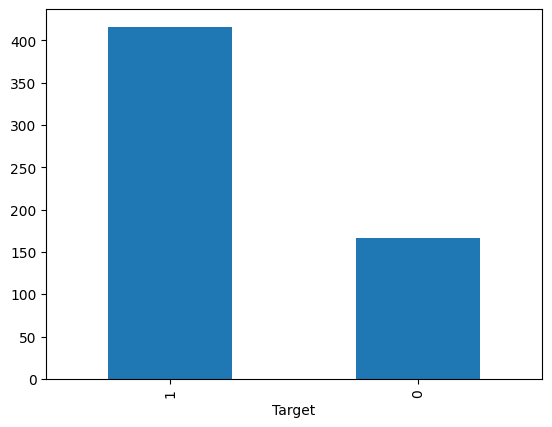

In [14]:
df['Target'].value_counts().plot(kind = 'bar')

#### The Age distribution shows patient from pediatric to elderly groups,indicating diverse liver disease.

<Axes: >

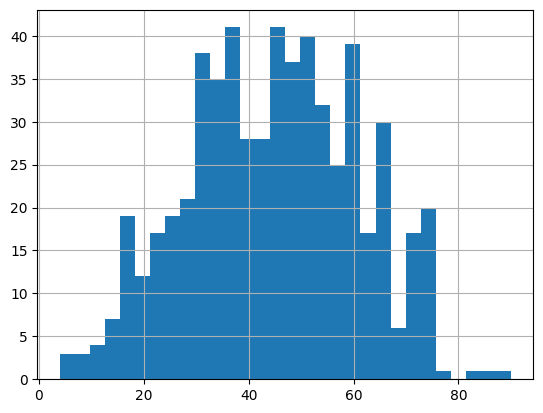

In [15]:
df['Age'].hist(bins= 30)

<Axes: >

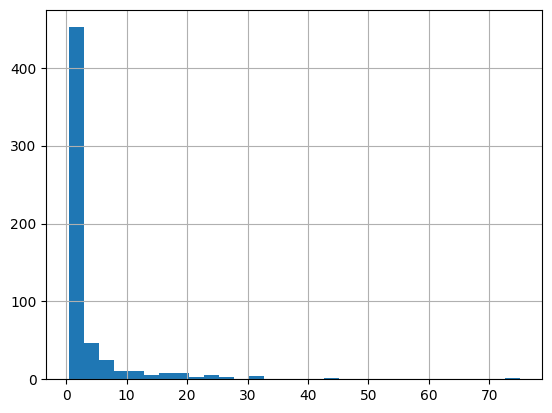

In [16]:
df['Total_Bilirubin'].hist(bins=30)


array([[<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>],
       [<Axes: title={'center': 'Aspartate_Aminotransferase'}>, <Axes: >]],
      dtype=object)

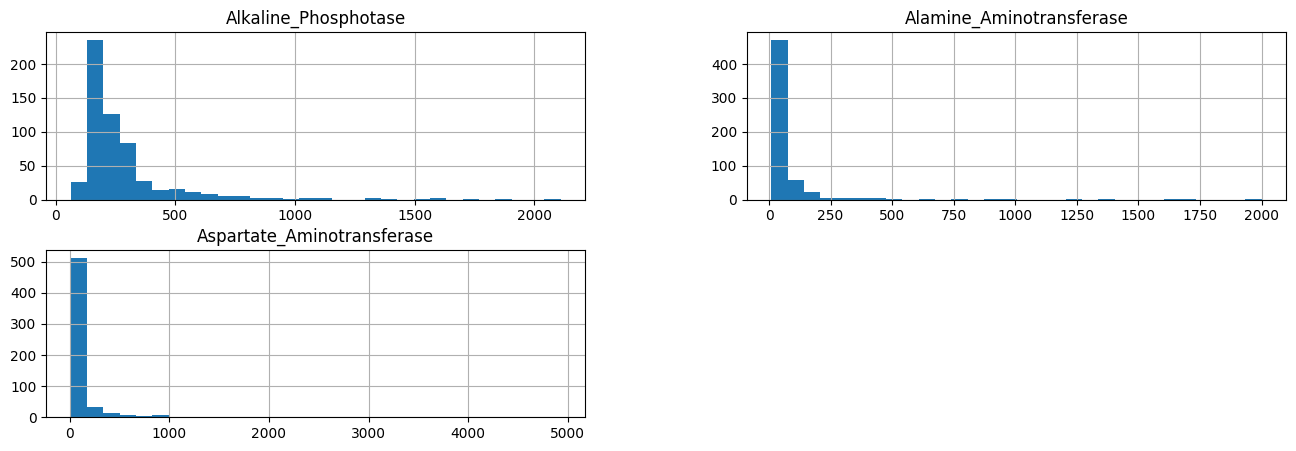

In [17]:
cols = [
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase'
]

df[cols].hist(bins=30, figsize=(16,5))


#### Liver enzyme levels show high variability, which is clinically expected in liver disease patients.

<Axes: xlabel='Gender'>

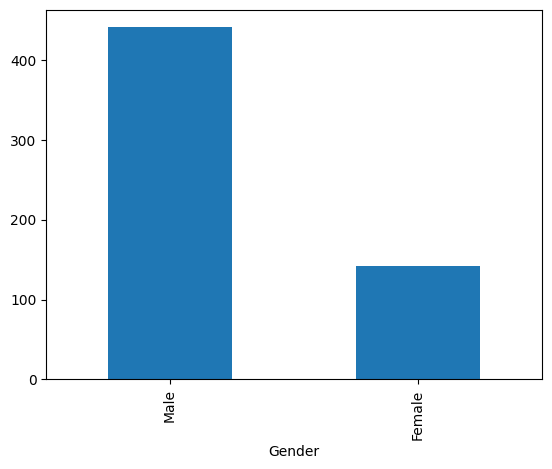

In [18]:
df['Gender'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Target', ylabel='Total_Bilirubin'>

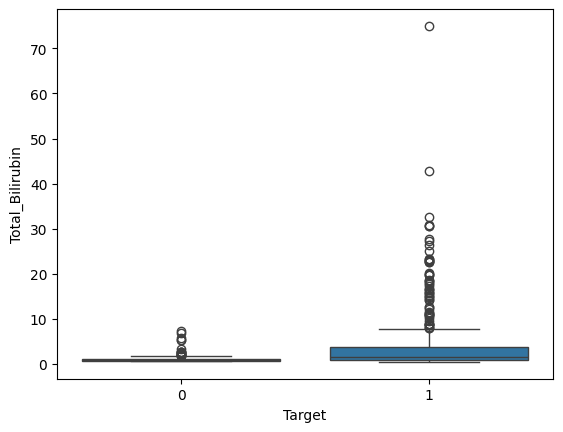

In [19]:
import seaborn as sns
sns.boxplot(x='Target',y = 'Total_Bilirubin',data = df)

### Patients with liver disease show higher bilirubin levels compared to non-disease cases

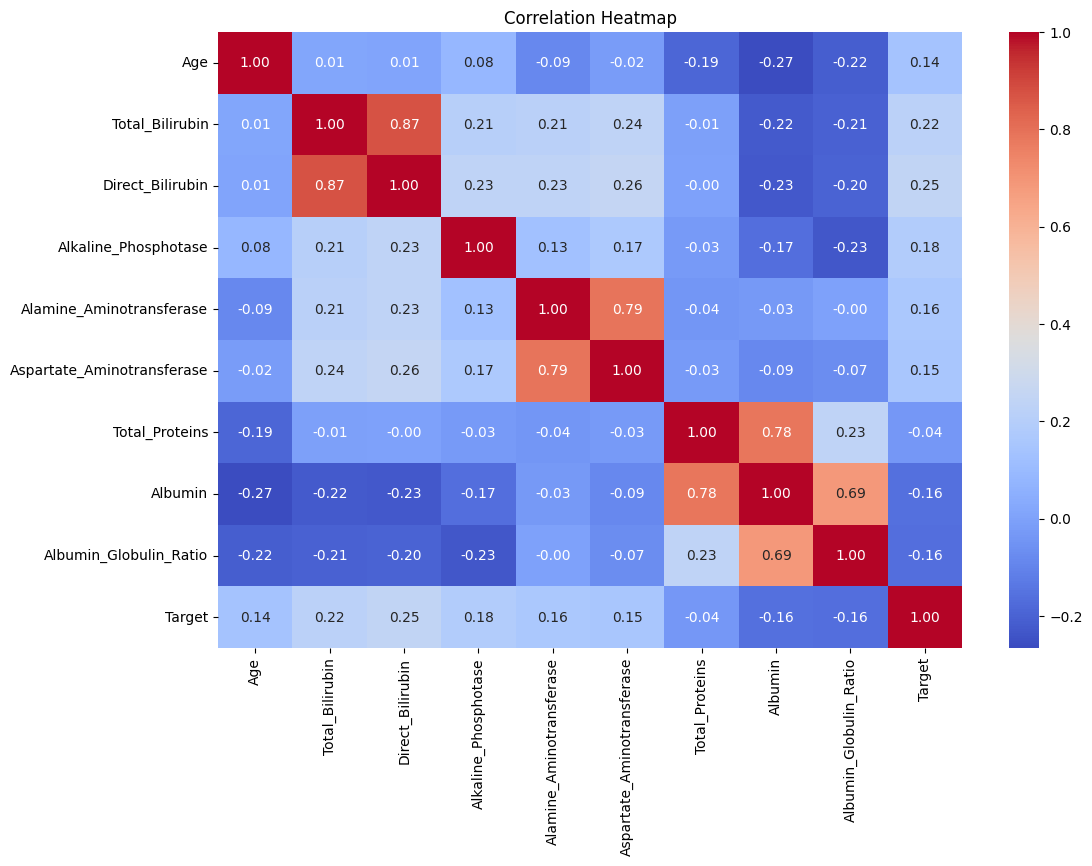

In [20]:
# Correlation Analysis
numerical_columns = []
for col in df.columns:
    if df[col].dtype!= 'object':
        numerical_columns.append(col)
numerical_columns   
corr = df[numerical_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Heatmap Analysis

-Total Bilirubin <-> Direct Bilirubin(0.87) Very strong positive correlation
Total bilirubin and direct bilirubin are highly correlated ,which makes medical sense because direct bilirubin is component of total bilirubin

- Alamine_Aminotransferase <-> Aspartate_Aminotransferase(0.79) strong correlation
Both are liver enzymes released during liver damage,so they naturally increase together.It is clinically valid.

- Albumin <-> Albumin_Globumin_Ratio(0.69)
Albumin directly affects the albumin -globulin ratio,so this correlation is expected

Instead of dropping correlated features,retained them because in healtcare data,correlated biomakers still represent different physiological processes,and removing them could reduce predictive power.

<Axes: >

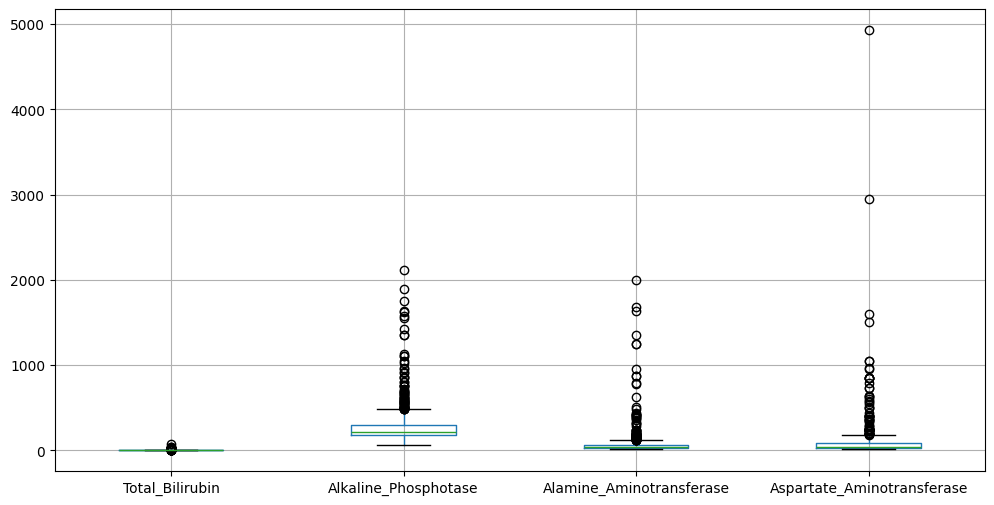

In [21]:
df.boxplot(column=[
    'Total_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase'],figsize=(12,6))

### Outliers Analysis:

- Alkaline Phosphatase
  very Wide spread.Many extreme values above 1000-2000

- Alamine Aminotransferase
 Extreme values reaching ~2000(This spikes reflect acute liver injury or inflammation)

- Aspartate_Aminotransferase
  Most extreme spread values up to ~5000(This Enzyme can rise sharply in severe liver damage and is expected to show extreme values in advance case)

- In mediacl dataset, extreme boimakers values represent severe disease cases.Removing them would bias the model and reduce its ability to detect critical conditions.
  so retained them and handled skweness using robust modelling techniques

### Task 2 Develpoing Machine Learning Model

### Model Training

In [22]:
x = df.drop('Target',axis=1)
y = df['Target']

In [23]:
x['Gender'] = x['Gender'].map({'Male':1,'Female':0})

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.2,random_state = 42,stratify = y)

#### Logistic Regression

In [25]:
## Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =  scaler.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced'
)
lr.fit(x_train_scaled,y_train)

y_pred_lr_default = lr.predict(x_test_scaled)  # predict() uses 0.5 threshold by default
y_prob_lr = lr.predict_proba(x_test_scaled)[:,1]  # probabilities for ROC-AUC

# Evaluation
print("LOGISTIC REGRESSION (Default Threshold 0.5)")
print(confusion_matrix(y_test, y_pred_lr_default))
print(classification_report(y_test, y_pred_lr_default))


# Optional: Compare with custom threshold later
threshold = 0.4
y_pred_lr_custom = (y_prob_lr >= threshold).astype(int)
print(f"\nLOGISTIC REGRESSION (Custom Threshold {threshold})")
print(confusion_matrix(y_test, y_pred_lr_custom))
print(classification_report(y_test, y_pred_lr_custom))


LOGISTIC REGRESSION (Default Threshold 0.5)
[[29  5]
 [26 57]]
              precision    recall  f1-score   support

           0       0.53      0.85      0.65        34
           1       0.92      0.69      0.79        83

    accuracy                           0.74       117
   macro avg       0.72      0.77      0.72       117
weighted avg       0.81      0.74      0.75       117


LOGISTIC REGRESSION (Custom Threshold 0.4)
[[21 13]
 [15 68]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        34
           1       0.84      0.82      0.83        83

    accuracy                           0.76       117
   macro avg       0.71      0.72      0.71       117
weighted avg       0.77      0.76      0.76       117



### Model Evaluation

- Default threshold = 0.5->missed 26 patients(false Negative) which is high risk in medical cases.

- Lower threshold to 0.4 -> fewer false negatives(FN = 15),more patients correctly identified

- Trade-off: slightly more false positives,but safer for clinical decision

#### Decision Tree

In [26]:
# DecisionTree Model Without FineTuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    class_weight = 'balanced',
    random_state = 42
)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)


print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[25  9]
 [26 57]]
              precision    recall  f1-score   support

           0       0.49      0.74      0.59        34
           1       0.86      0.69      0.77        83

    accuracy                           0.70       117
   macro avg       0.68      0.71      0.68       117
weighted avg       0.76      0.70      0.71       117



In [27]:
# DecisionTree model with finetuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [5, 10, 20]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid,
    scoring='recall',
    cv=5
)

grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred_grid_dt = best_dt.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_grid_dt))
print(classification_report(y_test, y_pred_grid_dt))



[[14 20]
 [22 61]]
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        34
           1       0.75      0.73      0.74        83

    accuracy                           0.64       117
   macro avg       0.57      0.57      0.57       117
weighted avg       0.65      0.64      0.64       117



#### Random Forest

In [28]:
# Random Forest Without finetuning
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 200,
    random_state = 42,
    class_weight = 'balanced'

)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9 25]
 [ 6 77]]
              precision    recall  f1-score   support

           0       0.60      0.26      0.37        34
           1       0.75      0.93      0.83        83

    accuracy                           0.74       117
   macro avg       0.68      0.60      0.60       117
weighted avg       0.71      0.74      0.70       117



In [29]:
# RandomForest With Finetuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10,20],
    'min_samples_leaf':[1,3,5,10],
    'max_features':['sqrt','log2']
}
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
grid_rf = GridSearchCV(
    rf,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(x_train,y_train)
print("Best parameters:",grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
[[ 9 25]
 [ 6 77]]
              precision    recall  f1-score   support

           0       0.60      0.26      0.37        34
           1       0.75      0.93      0.83        83

    accuracy                           0.74       117
   macro avg       0.68      0.60      0.60       117
weighted avg       0.71      0.74      0.70       117



### Random Forest Evaluation:
- Both the default and fine-tuned Random Forest models show almost identical performance on the test set, with an accuracy of 0.74 and high recall (0.93) for patients.
  
- The confusion matrices are very similar, indicating that tuning did not significantly improve predictions.

  
- This is likely because the default Random Forest is already robust and the dataset is relatively small. Therefore, the default Random Forest is sufficient for this task, effectively identifying patients while maintaining reasonable precision, making it reliable for medical decision-making.

### Task 3 Model Comparision

In [30]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
y_prod_lr = lr.predict_proba(x_test_scaled)[:,1]

y_prod_dt = best_dt.predict_proba(x_test)[:,1]

y_prod_rf = best_rf.predict_proba(x_test)[:,1]

In [31]:
auc_lr = roc_auc_score(y_test,y_prod_lr)
auc_dt = roc_auc_score(y_test,y_prod_dt)
auc_rf = roc_auc_score(y_test,y_prod_rf)
print("Logistic Regression AUC:",auc_lr)
print("Decision Tree AUc:",auc_dt)
print("Random Forest AUC:",auc_rf)

Logistic Regression AUC: 0.8302622253720765
Decision Tree AUc: 0.6102055279943303
Random Forest AUC: 0.7792345854004251


In [32]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prod_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prod_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prod_rf)


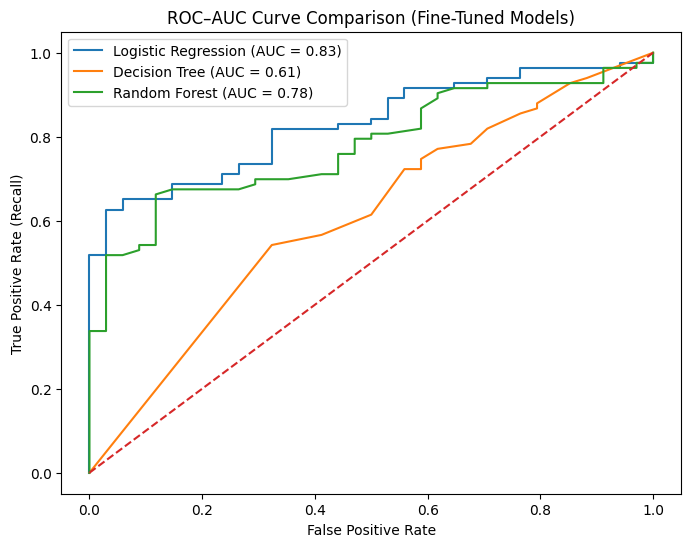

In [33]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Reference line
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC–AUC Curve Comparison (Fine-Tuned Models)')
plt.legend()
plt.show()


- Model Comparison & Final Selection
- Logistic Regression

  - Achieved the highest ROC-AUC (0.83), indicating better overall class separation.

  - Produces more stable and calibrated probabilities, which is important for medical   interpretation.

  - Model behavior is consistent and less biased across healthy and diseased patients.

- Random Forest

  - Shows higher recall for diseased patients (0.93), reducing false negatives.

  - However, it has very low recall for healthy patients, leading to frequent false alarms.

  - Model tends to be biased toward predicting disease, even when clinical parameters are normal.
 
    
- Although Random Forest minimizes false negatives, it over-predicts risk and flags many healthy patients as diseased. Logistic Regression provides a better balance, clearer probability interpretation, and more reliable predictions for real-world clinical screening. Therefore, Logistic Regression is preferred for deployment despite Random Forest’s higher recall.      

In [34]:
import pickle

artifacts = {
    "model": best_rf,
    "gender_mapping": {"Male": 1, "Female": 0},
    "feature_order": x_train.columns.tolist()
}

with open("rf_streamlit_model.pkl", "wb") as f:
    pickle.dump(artifacts, f)

print("Streamlit-ready model saved!")


Streamlit-ready model saved!


In [35]:
import pickle

lr_artifacts = {
    "model": lr,
    "scaler": scaler,
    "gender_mapping": {"Male": 1, "Female": 0},
    "feature_order": x_train.columns.tolist(),
    "threshold": 0.4
}

with open("lr_streamlit_model.pkl", "wb") as f:
    pickle.dump(lr_artifacts, f)

print("Logistic Regression Streamlit model saved!")


Logistic Regression Streamlit model saved!


# Task 3 Data Analysis why we select Logistic Regression:
- Logistic Regression

    - Achieved the highest ROC–AUC (0.83), indicating strong overall class separation across different thresholds.
    
    - Produces stable and well-distributed probabilities, which is important for medical risk scoring.
    
    - More interpretable, allowing doctors to understand how clinical parameters influence predictions.

- Random Forest

    - Slightly lower ROC–AUC (0.78) compared to Logistic Regression.
    
    - Shows very high recall for liver disease patients, but extremely low recall for healthy patients.
    
    - Demonstrates bias toward predicting disease, even when clinical parameters are within normal ranges.

- Final Model Choice (Why Logistic Regression was Selected)

   - Although Random Forest minimizes false negatives, it over-predicts disease risk, reducing clinical trust and usability.
    
    Logistic Regression provides a better balance between sensitivity and specificity, avoiding unnecessary patient anxiety.
    
    Its higher AUC, interpretability, and consistent probability behavior make it more suitable for real-world medical decision support.        